<a href="https://colab.research.google.com/github/analyst-rhie/Kaggle/blob/main/Titanic_%EC%A2%85%ED%95%A9%ED%8F%89%EA%B0%80_%EB%8B%B5%EC%A7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic 졸업 시험 [EDA - Modeling]
### 본 코드는 kaggle - titanic 코드 학습용으로 제작 되었으며 문제 - 답형식으로 구성되어 있습니다.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from collections import Counter

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,\
GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold,\
learning_curve

sns.set(style='white', context='notebook', palette='deep')

In [ ]:
!pip install pymysql
!pip install sqlalchemy

     |████████████████████████████████| 43 kB 2.2 MB/s 


In [ ]:
#train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/농산물/public_data/train.csv')
#train = pd.read_csv('E:/DACON/235801_2021 농산물 가격예측 AI 경진대회/public_data/train.csv')
#train.head(1000)
### MySQL DB에서 데이터 가져오기 ###
import pymysql
pymysql.install_as_MySQLdb()
import MySQLdb
from sqlalchemy import create_engine

db=None

try:
  db=pymysql.connect(host='192.168.0.4',
                     user='kanon39',
                     passwd='skszl1004!',
                     db='mysql',
                     charset = 'utf8')
  print('DB 연결 성공')
except Exception as e:
  print(e)
finally:
  if db is not None :
    db.close()
    print("DB 연결 닫기 성공")

(2003, "Can't connect to MySQL server on '192.168.0.4' (timed out)")


### pd.read_csv를 사용하여 데이터를 로드해라

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/타이타닉/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/타이타닉/test.csv')

### Tukey의 이상치 탐지법을 적용하는 함수를 작성해라. 그리고 첫번째 이상치인 745번째 값을 저장한 index 리스트에서 삭제해라
* output : 이상치가 1개 이상 포함하는 행들의 index의 리스트의 이름을 outliers_to_drop 으로 저장해라

 * 본 이상치 탐지법은 Tukey 방법에 따라 사용자가 지정한 n개 이상의 특이치를 포함하는 관측치를 골라내는 함수를 작성할 것이다.
  * detect_outliers 이름의 함수를 정의하라. 이때 들어가는 인수는 DataFrame이름, Outiler 갯수, 변수이름이다.
  * 각 변수로 부터 Q1, Q3 ,IQR = Q3 - Q1을 출력하는 변수를 위 Q1,Q3,IQR과 동일 한 이름으로 생성하라
  * outlier_step 이름에 IQR에 1.5를 곱해 outlier에 색출될 최소범위를 선택해라
  * Q1에서 outlier_step을 뺀 범위 또는 Q3에서 outlier를 더한 범위에 포함되는 index를 가져와 outlier_list_col에 저장하라
  * outlier_indices 리스트에 outlier_list_col을 extend해라
  * 모든 변수들이 위 extend 결과를 마치면, 이때 Counter 함수를 활용해 각 원소들이 몇번 반복됬는지 계산하여 outlier_indices에 덮어써라
  * outlier_indices 리스트의 값들을 outlier_indices 리스트에서 2개 이상의 이상치를 포함하고 있을때의 관측치를 선택하라. multiple_outliers에 저장하고 return해라


``` 
1. extend 함수는 리스트 끝에 반복되는 값이 리스트 일 경우 뒤에 붙여주는 역할을 함 
 -> 이떄 extend에 사용되는 리스트를 처음 지정하는 = [] 위치는 for문에 속해있으면 안된다. 조심할것!
2. 코드 예시에서는 np.percentile()을 사용했으나 Fare의 경우 결측(nan)이 존재하여 Q1, Q3결과가 nan으로 출력됨.
 -> np.nanpercentile() 으로 nan을 무시하고 출력하도록 함.
 3. Counter() 함수는 한 리스트 내에 동일한 값이 몇개 있는지 딕셔너리 형태로 출력해준다.
 4. Counter()함수로 만든 딕셔너리를 .items()로 가져오면 순서쌍으로 묶어준다. 따라서 for 문 내 두 개의 iterator를 사용하더라도 zip()을 안쓰고도 가져올 수 있게된다.
```

In [ ]:
def detect_outliers(df, n, features):
  ## outliers가 한개 이상 포함된다고 표현할 때 n=1을 입력해주면 된다.
  outlier_indices = []
  for col in features :
    print("=========================")
    print("col name : ", col)
    Q1 = np.nanpercentile(df[col], 25)
    print("Q1 : ",Q1)
    Q3 = np.nanpercentile(df[col],75)
    print("Q3 : ",Q3)
    IQR = Q3 - Q1
    print("IQR : ",IQR)
    outlier_step = 1.5*IQR
    print("outlier_step : ",outlier_step)
    outlier_list_col = df[(df[col]<Q1 - outlier_step)|(df[col]>Q3+outlier_step)].index
    print("outlier_list_col : ",outlier_list_col)
    outlier_indices.extend(outlier_list_col)
    print("outlier_indices extend 전 :",outlier_indices)
  
  outlier_indices = Counter(outlier_indices)
  print("outlier_indices extend 후 :",outlier_indices)
  print("outlier_indices.items() : ",outlier_indices.items())
  multiple_outliers = list(k for k, v in outlier_indices.items() if v>n)
  print("multiple_outliers : ",multiple_outliers)
  return multiple_outliers

outliers_to_drop = detect_outliers(train,1,['Age','SibSp','Fare'])
print("출력 된 값은 ? : ",outliers_to_drop)


del outliers_to_drop[0]

### outliers_to_drop에 해당하는 index를 train에서 삭제하고 index를 다시 정렬해

In [ ]:
train.drop(outliers_to_drop, axis=0).reset_index(drop=True)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
876,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
877,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
878,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
879,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### train의 행의 갯수를 train_len에 저장하고 train, test셋을 dataset 이름으로 결합해라

In [ ]:
train_len=len(train)

dataset = pd.concat([train,test], axis=0).reset_index(drop=True)

### train의 변수 타입을 확인하고, NaN과 비어있는 값을 NAN으로 바꾸어라. 그리고 NUll이 얼마나 있는지 확인해라

In [ ]:
dataset = dataset.fillna(np.nan)
dataset.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

### train의 요약통계량을 내라

In [ ]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### dataset 데이터를 활용하여 "Survived","SibSp","Parch","Age","Fare"의 corrlation을 계산하고 시각화해라
  * sns.heatmap으로 표현하라
  * 단, 각 corr에는 값이 표기되어야 한다.
  * coolwarm으로 시각 색을 바꾸어라

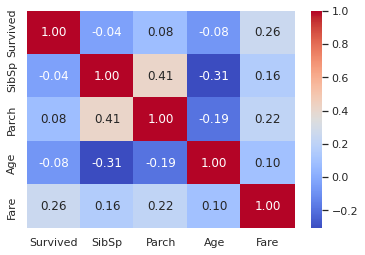

In [ ]:
g = sns.heatmap(train[['Survived','SibSp','Parch','Age','Fare']].corr(), annot=True, fmt = '.2f',cmap = 'coolwarm')

### train의 생존 = 1, 사망 = 0인 Survived와 SibSp의 생존 비율을 보기 위해 막대그래프를 그려라. 
  * ylabels는 Survival probability로 표현하라
  * sns.factorplot을 활용해라

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


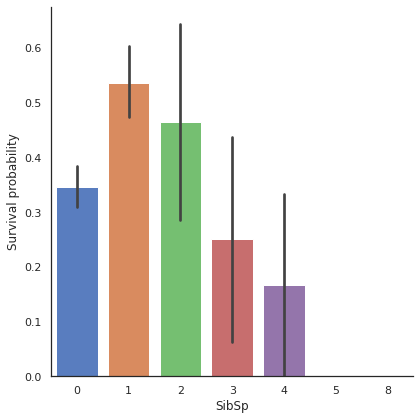

In [ ]:
g = sns.factorplot(x = 'SibSp', y='Survived', data=train, kind = 'bar', size=6, palette='muted')
g = g.set_ylabels("Survival probability")

### Survived 변수를 활용하여 train의 생존, 사망 각각에 나이가 null이 아닌 Age의 분포 플롯을 그려라
  * 두개의 그래프를 겹쳐야 한다.
  * 생존은 Red로, 사망은 Blue로 색을 표현하라
  * xlabel은 Age로, ylabel은 Frequency로 표현해라
  * 각 그래프별 범례(legend)를 각각 Not Survived, Survived로 표현하라

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


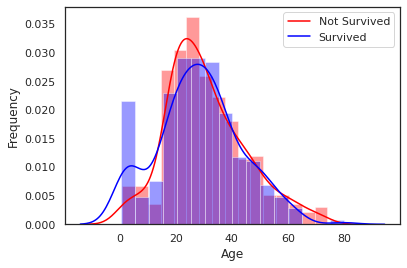

In [ ]:
g = sns.distplot(train['Age'][(train['Survived']==0)&(train["Age"].notnull())],\
                color='Red')
g = sns.distplot(train['Age'][(train['Survived']==1)&(train['Age'].notnull())],\
                ax=g, color="Blue")
g.set_xlabel("Age")
g.set_ylabel("Frequency")
g = g.legend(["Not Survived","Survived"])

### dataset의 Fare 변수의 결측을 Fare 중앙값으로 대체해라

In [ ]:
dataset['Fare'] = dataset['Fare'].fillna(dataset["Fare"].median())

### train의 skewness를 계산하고 Fare 분포를 그려라
  * 이때 label은 skewness값이 표기되어야 하며 이는 소수점 두번째 자리까지 표현되야 한다.
  * label을 범례로 표현하라

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


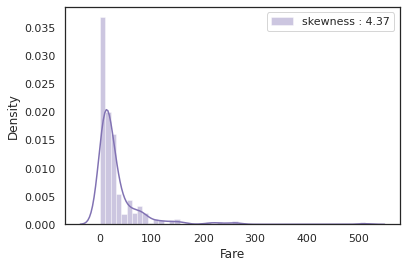

In [ ]:
g = sns.distplot(train['Fare'], color="m", label="skewness : %.2f"%(dataset['Fare'].skew()))
g = g.legend(loc='best')

### Fare 변수를 dataset의 Fare변수로 대체하는데, 각 값을 log취하라
  * map()과 lambda를 이용해라

In [ ]:
dataset["Fare"] = dataset['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

### train 데이터의 성별(Sex)을 생존율(Survived)에 대한 막대그래프를 그려라
  * sns의 barplot을 활용해라
  * 이때 ylabel은 Survival Probability로 표현하라

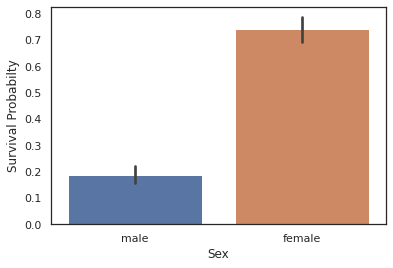

In [ ]:
g = sns.barplot(x="Sex", y="Survived", data=train)
g = g.set_ylabel("Survival Probabilty")

### train 데이터의 성별별 Survived의 평균을 계산하라

In [ ]:
train.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

### train의 성별에 따른 Pclass와 Survival그래프를 그려라.  
(성별이 group이 된다.)
  * sns의 factorplot을 활용하여 그려라
  * ylabel은 Survival Probability로 표현하라


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


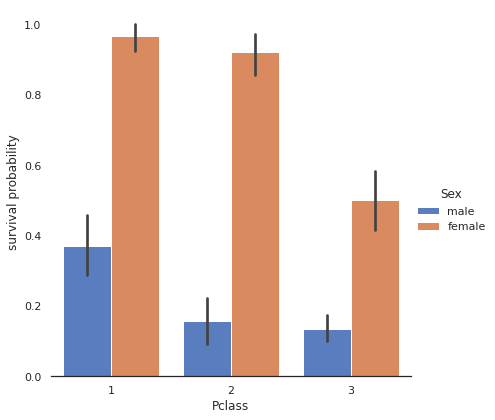

In [ ]:
g = sns.factorplot(x='Pclass', y="Survived",hue='Sex', data=train,\
                   size=6, kind='bar',palette='muted')
g.despine(left=True)
g = g.set_ylabels("survival probability")

### dataset 데이터의 Embarked의 null값을 계산하고 최빈값으로 대체해라 

In [ ]:
dataset["Embarked"] = dataset.loc[dataset.Embarked.isnull(), "Embarked"] = dataset['Embarked'].mode()[0]

### dataset 데이터의 Pclass별 Embarked의 count 그래프를 그려라
  * sns와 factorplot를 활용해라
  * 하나의 그래프에 Embarked가 몰려 있는게 아닌, Embarked 별로(즉 3개의) 그래프가 그려져야 한다.
  * y축이 빈도가아닌 count임에 유의해라
  * ylabel은 Count로 표기해라

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


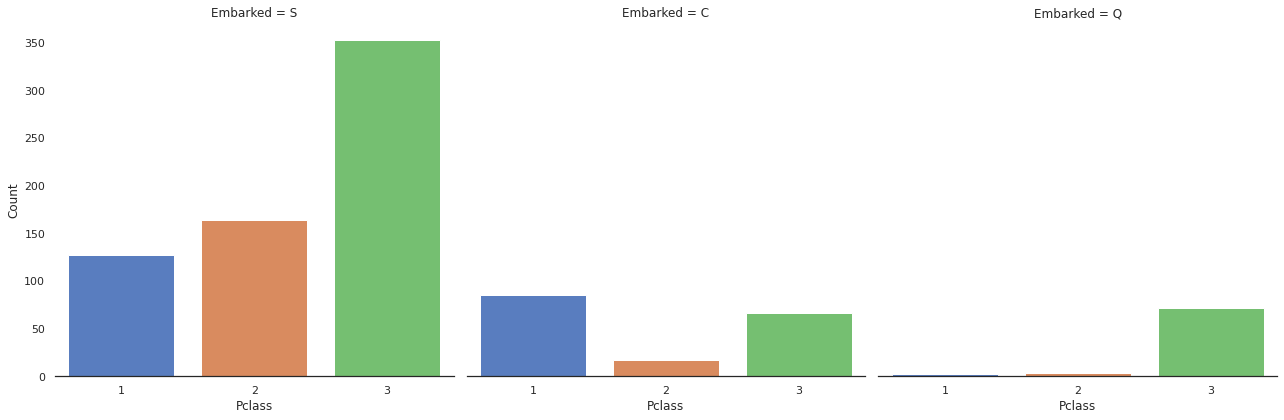

In [ ]:
g = sns.factorplot('Pclass', col='Embarked', data=train,\
                   size=6, kind="count",palette="muted")
g.despine(left=True)
g = g.set_ylabels("Count")

### dataset을 이용하여 y축이 age이며 x축이 Sex, Parch, SibSp인 상자그림을 그려라.
  * y축이 age, x축이 Sex인 경우 두개의 상자그림을 그려라. 이때 하나는 Pclass로 grouping하여라.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr

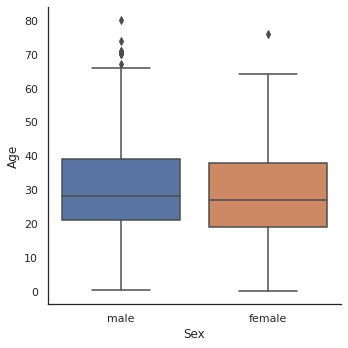

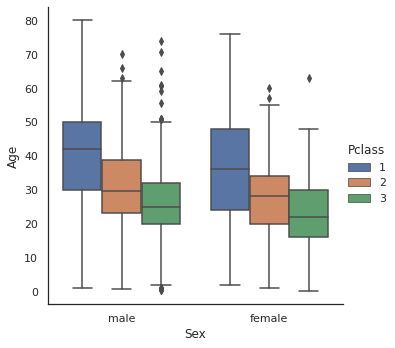

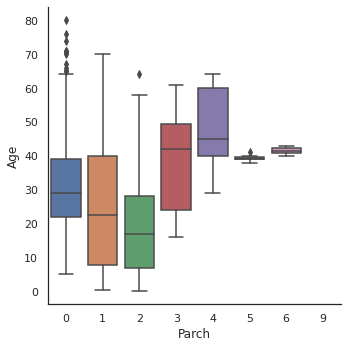

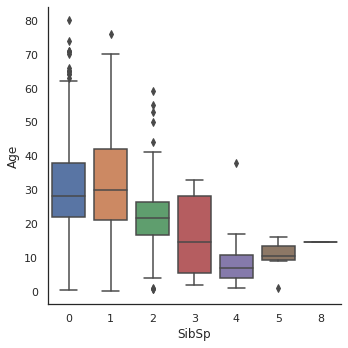

In [ ]:
g = sns.factorplot(y='Age', x='Sex', data=dataset, kind='box')
g = sns.factorplot(y='Age', x='Sex', hue='Pclass', data=dataset, kind='box')
g = sns.factorplot(y='Age', x='Parch', data=dataset, kind='box')
g = sns.factorplot(y='Age', x='SibSp', data=dataset, kind='box')

### dataset의 map함수와 dict을 활용하여 Sex값을 남자면 0, 여자면 1로 대체해라

In [ ]:
dataset['Sex'] = dataset['Sex'].map({'male':0, 'female':1})

### 위에서 대체한 Sex변수를 Age, Sex, SibSp, Parch, Pclass의 상관계수를 구해라.
  * cmap은 BrBG 로 설정해라
  * 각 상관계수 값을 표기하라

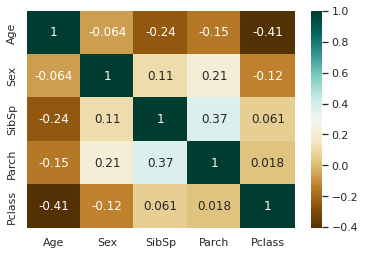

In [ ]:
g = sns.heatmap(dataset[['Age','Sex','SibSp','Parch','Pclass']].corr(),cmap='BrBG',\
                annot=True)

### dataset의 Pclass, Parch, SibSp이 같은 행의 age 중앙값으로 나이(Age) 결측을 대체하는 코드를 작성해라

  * index_NaN_age 객체에 Age가 null인 index를 저장하라
  * 위의 결측인 인덱스를 이용해 반복문으로 아래 조건을 작성하라
    * age_med에 Age의 중앙값을 지정하라
    * 결측인 Age 값에 대해 SibSp, Parch, Pclass가 같은 경우의 중앙값을 계산하여 age_pred 객체에 저장하라
    * SibSp, Parch, Pclass 중 하나라도 결측이면 age_pred가 결측이 될것이다. 만약 age_pred값이 결측이 아니면 위 index_NaN_Age의 인덱스에 해당하는 age가 age_pred와 같고, 결측이면 Age의 중앙값을 저장한 age_med와 같게 결측을 대체하는 식을 작성해라.

In [ ]:
index_NaN_age = list(dataset['Age'][dataset['Age'].isnull()].index)
dataset['Age'] = dataset['Age'].copy()
for i in index_NaN_age :
  age_med = dataset["Age"].median()
  # age의 결측값이 존재하는 index 행 하나의 SibSp, Parch, Pclass가 같은 age행들의 중앙값 구하기
  age_pred = dataset['Age'][((dataset['SibSp'] == \
                             dataset.iloc[i]['SibSp']) & 
                            (dataset['Parch'] == dataset.iloc[i]['Parch']) &
                            (dataset['Pclass'] == dataset.iloc[i]['Pclass']))].median()
  print('age_pred :', age_pred)
  if not np.isnan(age_pred):
    dataset['Age'].iloc[i] = age_pred
  else :
    dataset['Age'].iloc[i] = age_med

### Feature Engineering


### dataset의 Name변수를 가져와 dataset_title이름으로 리스트 형태로 저장해라
  * 방법1) split(), strip()을 활용해라
  * 방법2) ([A-Za-z]+)\. 정규식을 활용해라

In [ ]:
# 방법 1 #
dataset_title = dataset['Name'].str.extract('([A-Za-z]+)\.')
#알파벳이 하나이상이([A-Za-z]+) , 점(.) 앞에 있는 경우를 출력해라(\.)

# 방법 2 #
dataset_title = [i.split(",")[1].split(".")[0].strip() for i in dataset['Name']]

### dataset_title을 dataset 데이터 프레임에 Title 변수로 추가해라

In [ ]:
dataset['Title'] = pd.Series(dataset_title)

### dataset의 Title 변수를 활용해서 count 플롯을 그려라
  * sns의 countplot을 활용해라
  * x축 라벨을 45도로 회전시켜라

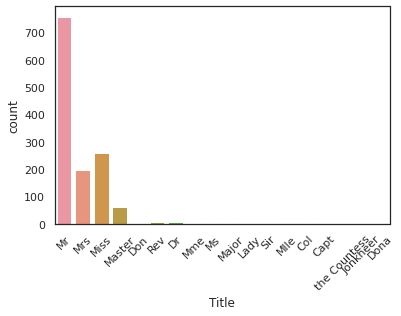

In [ ]:
g = sns.countplot(x='Title', data=dataset)
g = plt.setp(g.get_xticklabels(), rotation=45)

### dataset의 title변수의 주요 4개의 4개의 Mr, Mrs, Miss, Master 외에는 rare 값 하나로 그룹핑 해라. 그리고 각 값을 map함수를 이용하여 범주형 변수로 변환해라.  
("Master":0, "Miss":1, "Ms" : 1 , "Mme":1, "Mlle":1, "Mrs":1, "Mr":2, "Rare":3)
  * reaplce를 이용하여 'Lady', 'the Countess','Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'를 'Rare' 로 대체해라
  * 이후 변환한 Title을 int로 변환해라

In [ ]:
dataset["Title"] = dataset["Title"].replace(['Lady', 'the Countess','Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
dataset["Title"] = dataset["Title"].map({"Master":0, "Miss":1, "Ms" : 1 , "Mme":1, "Mlle":1, "Mrs":1, "Mr":2, "Rare":3})
dataset["Title"] = dataset["Title"].astype(int)

### x ticklabel을 'Master, 'Miss/Ms/Mme/Mile/Mrs, Mr, Rare 로 표현하는 빈도표를 그려라. 이때 x축은 Title 이다.
  * sns countplot을 그려라

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


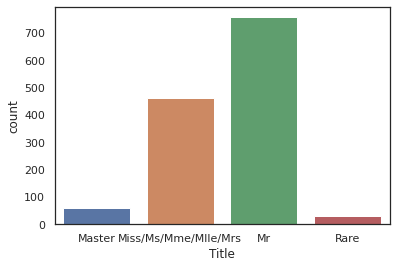

In [ ]:
g = sns.countplot(dataset['Title'])
g = g.set_xticklabels(["Master","Miss/Ms/Mme/Mlle/Mrs","Mr","Rare"])

### dataset 데이터셋을 이용해 Fsize 변수를 SibSp + Parch + 1 하여 계산하라. 그리고 factorplot을 그려라.
  * x는 Fsize, y는 Survived 이다.
  * y축은 빈도가 아닌 생존 확률이며 ylabel을 Survival Probability로 표현하라

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


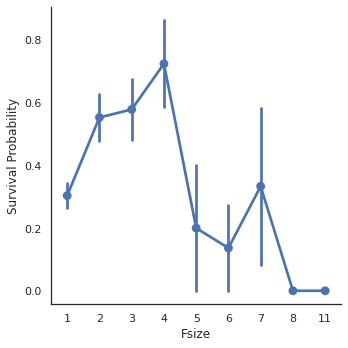

In [ ]:
dataset['Fsize'] = dataset['SibSp'] + dataset['Parch'] +1
g = sns.factorplot(x='Fsize', y='Survived', data=dataset)
g = g.set_ylabels("Survival Probability")

### Fsize가 1이면 Single, 2면 SmallF, 3또는 4이면 MedF, 5이상이면 LargeF인 변수를 생성 하고 각 값에 해당하면 1 아니면 0으로 코딩해라
  * map 함수와 lambda를 사용해라.

In [ ]:
dataset['Single'] = dataset['Fsize'].map(lambda s : 1 if s==1 else 0)
dataset['SmallF'] = dataset['Fsize'].map(lambda s : 1 if s==2 else 0)
dataset['MedF'] = dataset['Fsize'].map(lambda s : 1 if 3<=s<=4 else 0)
dataset['LargeF'] = dataset['Fsize'].map(lambda s: 1 if s >=5 else 0)

### Single, SmallF, MedF, LageF 각 변수에 대해 y가 Survived인 빈도표를 그려라
  * for문을 이용해서 변수마다 표현해라
  * sns의 factorplot을 활용해라.
  * ylabels는 Survival Probability 로 표현해라

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr

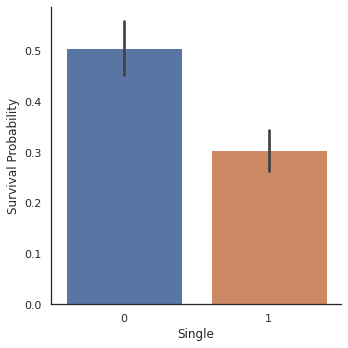

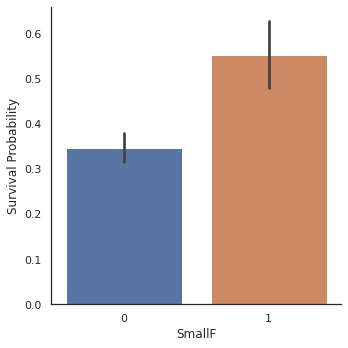

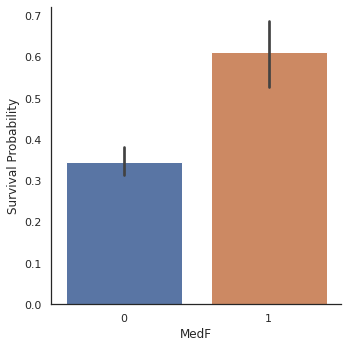

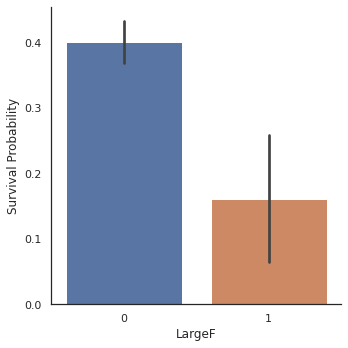

In [ ]:
for i in ['Single','SmallF','MedF', 'LargeF']:
  g=sns.factorplot(x=i, y='Survived', data=dataset, kind='bar')
  g.set_ylabels("Survival Probability")

### Title과 Embarked를 one-to-hot 코딩해라
  * Embarked의 접두사는 Em 으로 해라

In [ ]:
dataset = pd.get_dummies(dataset, columns=['Title'])
dataset = pd.get_dummies(dataset, columns=['Embarked'], prefix='Em')

### dataset에서 Cabin이 결측이 아닌 값들 10개 행을 출력해라

In [ ]:
dataset['Cabin'][dataset['Cabin'].notnull()].head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

### dataset의 Cabin의 기초통계를 산출해라

In [ ]:
dataset.Cabin.describe()

count             295
unique            186
top       C23 C25 C27
freq                6
Name: Cabin, dtype: object

### dataset의 Cabin의 값이 결측이면 'X'를 삽입해라

In [ ]:
dataset['Cabin'] = pd.Series([i[0] if not pd.isnull(i) else 'X' for i in dataset['Cabin']])
dataset['Cabin']

0       X
1       C
2       X
3       C
4       X
       ..
1304    X
1305    C
1306    X
1307    X
1308    X
Name: Cabin, Length: 1309, dtype: object

### dataset의 Cabin에 대해 빈도표를 산출해라
  * sns의 countplot을 이용해라
  * 이때 X축의 순서는 A,B,C,D,E,F,G,T,X로 표현해라

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


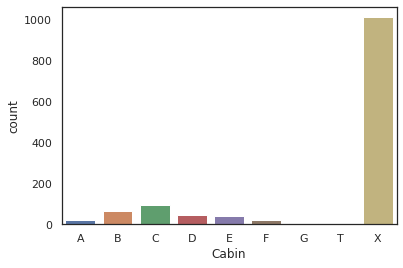

In [ ]:
g = sns.countplot(dataset['Cabin'], order = ['A','B','C','D','E','F','G','T','X'])

### dataset에서 x축은 Cabin, Y축은 Survived인 바 그래프를 그려라. 이때 order 순서는 A,B,C,D,E,F,G,T,X이다.
  * y 라벨은 Survival Probability 이다.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


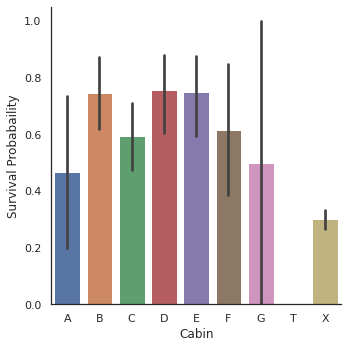

In [ ]:
g = sns.factorplot(y='Survived', x='Cabin', data=dataset, kind='bar',\
                   order = ['A','B','C','D','E','F','G','T','X'])
g = g.set_ylabels("Survival Probabaility")

### dataset의 Cabin의 접두사를 Cabin으로하여 더미변수를 생성해라

In [ ]:
dataset = pd.get_dummies(dataset, columns = ['Cabin'], prefix ='Cabin')

### dataset의 Ticket 변수를 생성하고
  * 만약 각 Ticket값이 모두 숫자로 이루어져 있지 않다면 다음을 실행해라(isdigit() 사용)
    * Ticket값이 .와 /를 삭제해라
    * 이어서 공백을 strip()을 이용해 제거해라
    * split(" ")으로 나누고 첫번째 값을 Ticket에 저장해라
  * 만약 각 Ticket값이 문자 하나 이상 값이 존재한다거나 결측이면 그 값을 Ticket에 'X'로 저장해라

In [ ]:
Ticket = []
for i in list(dataset.Ticket):
  if not i.isdigit() :
    Ticket.append(i.replace(".","").replace("/","").strip().split(" ")[0])
  else :
    Ticket.append("X")
dataset["Ticket"] = Ticket
dataset["Ticket"].head()

0        A5
1        PC
2    STONO2
3         X
4         X
Name: Ticket, dtype: object

### dataset의 Ticket변수에 대해 접두사가 T인 더미변수를 만들어라

In [ ]:
dataset = pd.get_dummies(dataset, columns=['Ticket'], prefix='T')

### dataset의 Pclass 타입을 category로 만들고 이 Pclass에 대해 접두사가 Pc인 더미변수를 만들어라

In [ ]:
dataset['Pclass'] = dataset['Pclass'].astype('category')
dataset = pd.get_dummies(dataset, columns=['Pclass'], prefix = 'Pc')

### PassengerId, Name을 drop하라

In [ ]:
dataset.drop(['PassengerId','Name'], axis=1, inplace=True)

### Modeling

### dataset으로부터 분할 후 train과 test셋에 각각 저장해라. 이후 test 데이터셋에서 Survived 변수를 drop하라 

In [ ]:
train = dataset[:train_len]
test = dataset[train_len:]
test.drop('Survived', axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### train의 Survived를 int형태로 변환해라. y_train 에 train의 Survived를 저장하고, train에서는 Survived를 삭제해라

In [ ]:
train['Survived'] = train['Survived'].astype('int')
y_train = train['Survived']
X_train = train.drop('Survived', axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### 교차검증 횟수 지정 
### StratifiedKFold 함수를 이용해서 10번 folds하는 함수를 kfold에 저장하라

In [ ]:
kfold = StratifiedKFold(n_splits = 10)

### randomstate = 2이며 classifiers에 리스트로 append하여 아래 10가지의 각 classifier()을 작성해라
  * SVC
  * DecisionTreeClassifier
  * AdaBoostClassifier를 활용한 DecisionTreeClassifier이며 learning_rate = 0.1
  * RandomForestClassifier
  * ExtraTreesClassifier
  * GraidentBoostingClassifier
  * MLPClassifier
  * KNeighborsClassifier
  * LogisticRegression
  * LinearDiscriminantAnalysis


In [ ]:
random_state = 2
classifiers = []

classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state = random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state = random_state),\
                                      random_state = random_state, learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state = random_state))
classifiers.append(ExtraTreesClassifier(random_state = random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())

### 저장된 classifiers 개체의 각 모델의 cross validation score를 계산하여 cv_results 이름으로 append하여 accuracy를 저장하라 
  * CPU 코어는 4개를 활용해라
  * cross validation 횟수는 위에 저장한 kfold변수를 활용해라

In [ ]:
cv_results = []

for classifier in classifiers:
  print(cv_results)
  cv_results.append(cross_val_score(classifier, X_train, y=y_train, scoring='accuracy',\
                                    cv = kfold, n_jobs= 4))

[]
[array([0.68888889, 0.71910112, 0.68539326, 0.79775281, 0.69662921,
       0.70786517, 0.74157303, 0.74157303, 0.79775281, 0.71910112])]
[array([0.68888889, 0.71910112, 0.68539326, 0.79775281, 0.69662921,
       0.70786517, 0.74157303, 0.74157303, 0.79775281, 0.71910112]), array([0.73333333, 0.7752809 , 0.76404494, 0.82022472, 0.87640449,
       0.83146067, 0.82022472, 0.80898876, 0.84269663, 0.82022472])]
[array([0.68888889, 0.71910112, 0.68539326, 0.79775281, 0.69662921,
       0.70786517, 0.74157303, 0.74157303, 0.79775281, 0.71910112]), array([0.73333333, 0.7752809 , 0.76404494, 0.82022472, 0.87640449,
       0.83146067, 0.82022472, 0.80898876, 0.84269663, 0.82022472]), array([0.74444444, 0.78651685, 0.7752809 , 0.84269663, 0.85393258,
       0.83146067, 0.78651685, 0.78651685, 0.85393258, 0.83146067])]
[array([0.68888889, 0.71910112, 0.68539326, 0.79775281, 0.69662921,
       0.70786517, 0.74157303, 0.74157303, 0.79775281, 0.71910112]), array([0.73333333, 0.7752809 , 0.76404494

### cv_result의 각 평균과 표준편차를 계산하여 cv_mean, cv_std 각 객체 리스트에 append 하는 식을 작성해라

In [ ]:
cv_means = []
cv_std = []
for cv_result in cv_results :
  cv_means.append(cv_result.mean())
  cv_std.append(cv_result.std())

### cv_res 객체에 데이터 프레임을 생성해라 
  * 첫번째 변수 CrossValMeans 변수는 cv_means,
  * 두번째 변수 CrossValerrors 변수는 cv_std,
  * 세번째 변수 Algorithm 변수는 다음의 리스트를 입력하여라
  ["SVC","DecisionTree","AdaBoost", "RandomForest","Extratrees",
"GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis"]

In [ ]:
cv_res = pd.DataFrame({"CrossValMeans":cv_means, "CrossValerrors":cv_std,"Algorithm":\
                       ["SVC","DecisionTree","AdaBoost","RandomForest","Extratrees",\
                        "GradientBoosting","MultipleLayerPerceptron","KNeighboors",\
                        "LogisticRegression","LinearDiscriminantAnalysis"]})

NameError: ignored

### Algorigm 변수에 따라 CrossValMeans 변수의 평균값 도표를 그려라.
  * 이때 각 알고리즘 값 끝에 표준편차를 표현하라. ( **{'xerr': cv_std} 활용)
  * xlabel은 Mean Cuuracy로 표현하라
  * 타이틀은 Cross validation scores 로 표현하라

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


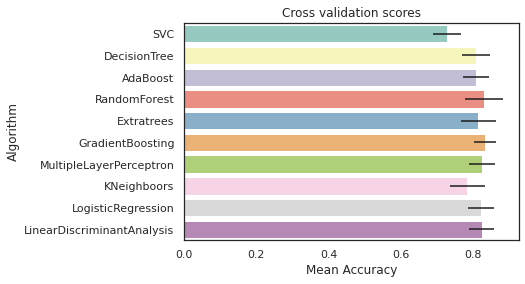

In [ ]:
g = sns.barplot("CrossValMeans", "Algorithm", data=cv_res, palette='Set3', orient='h',\
                **{'xerr' : cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")